# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** FILBERT RESTU YUDHA FIRMANSYAH
- **Email:** nicodragon@gmail.com
- **ID Dicoding:** filbert_king

## Menentukan Pertanyaan Bisnis

- Bagimana total penjualan yang didapatkan pada 
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [287]:
%matplotlib inline
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

In [288]:
url = "data"


In [289]:
customers_df = pd.read_csv(f"{url}/customers_dataset.csv", delimiter=",")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [290]:
geolocation_df = pd.read_csv(f"{url}/geolocation_dataset.csv", delimiter=",")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [291]:
order_items_df = pd.read_csv(f"{url}/order_items_dataset.csv", delimiter=",")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [292]:
order_reviews_df = pd.read_csv(f"{url}/order_reviews_dataset.csv", delimiter=",")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [293]:
orders_df = pd.read_csv(f"{url}/orders_dataset.csv", delimiter=",")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [294]:
product_categories_df = pd.read_csv(f"{url}/product_category_name_translation.csv", delimiter=",")
product_categories_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [295]:
products_df = pd.read_csv(f"{url}/products_dataset.csv", delimiter=",")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [296]:
sellers_df = pd.read_csv(f"{url}/sellers_dataset.csv", delimiter=",")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Assessing Data

**Customers**

In [297]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [298]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [299]:
print("Jumlah Duplikasi: ", customers_df.duplicated().sum())

Jumlah Duplikasi:  0


In [300]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**geolocation_df**

In [301]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [302]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [303]:
print("Jumlah duplikat: ", geolocation_df.duplicated().sum())


Jumlah duplikat:  261831


In [304]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**order_items_df**

In [305]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [306]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**order reviews**

In [307]:
print("Jumlah duplikat: ", order_items_df.duplicated().sum())

Jumlah duplikat:  0


In [308]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [309]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [310]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [311]:
print("Jumlah duplikat", order_reviews_df.duplicated().sum())

Jumlah duplikat 0


In [312]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**orders_df**

In [313]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [314]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [315]:
orders_df.duplicated().sum()

0

In [316]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**product_categories_df**

In [317]:
product_categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [318]:
product_categories_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [319]:
print("Jumlah duplikasi", product_categories_df.duplicated().sum())

Jumlah duplikasi 0


In [320]:
product_categories_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**products_df**

In [321]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [322]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [323]:
print("Jumlah duplikasi", products_df.duplicated().sum())

Jumlah duplikasi 0


In [324]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**sellers_df**

In [325]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [326]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [327]:
print("Jumlah duplikasi ", sellers_df.duplicated().sum())

Jumlah duplikasi  0


In [328]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


## Identifikasi Masalah

**geolocation_df**
    - Duplicate

**order_reviews_df**
    - Missing Value
        1. review_comment_title
        2. review_comment_message

**orders_df**
    - Missing Value
        1. order_approved_at 
        2. order_delivered_carrier_date
        3. order_delivered_customer_date

**products_df**
    - Missing Value

### Cleaning Data

**geolocation_df**

Duplikat data

In [329]:
print("Jumlah duplikat sebelum: ", geolocation_df.duplicated().sum())
geolocation_df.drop_duplicates(inplace=True)

print("Jumlah duplikat sesudah: ", geolocation_df.duplicated().sum())

Jumlah duplikat sebelum:  261831
Jumlah duplikat sesudah:  0


In [330]:
print(geolocation_df['geolocation_zip_code_prefix'].duplicated().sum())
geolocation_df.drop_duplicates(subset= ['geolocation_zip_code_prefix', 'geolocation_city'],inplace= True)
geolocation_df.sort_values(by='geolocation_city', ascending=False)

719317


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
394381,18790,-22.941366,-49.340714,óleo,SP
769309,68250,-1.909321,-55.510995,óbidos,PA
695823,46180,-13.393047,-42.134282,érico cardoso,BA
889778,86755,-23.198309,-51.916100,ângulo,PR
999612,99835,-27.692454,-52.055957,áurea,RS
...,...,...,...,...,...
804356,75345,-16.766457,-49.434210,abadia de goias,GO
896977,87365,-24.281905,-53.074516,4º centenario,PR
896733,87365,-24.271860,-53.069433,4o. centenario,PR
525385,28930,-22.969370,-42.029834,...arraial do cabo,RJ


**Order Reviews**

Missing value

In [331]:
order_reviews_df.fillna({
    'review_comment_title': 'Kosong',
    'review_comment_message': 'Kosong',
}, inplace=True)

print(order_reviews_df.isna().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


**orders_df**

Missing value

In [332]:
#----Inisiasi-------------
statuses = [ 'shipped', 'canceled', 'unavailable', 'invoiced', 'processing', 'created', 'approved','delivered'] # Mengambil status yang berada di kolom order_status
# array yang berisi kolom yang akan diisi missing valuenya di mana kolom pertama dan terakhir sebagai acuan
delivered_date_col = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
# Mengubah kolom yang memiliki struktur dateType menjadi dateType
orders_df[delivered_date_col] = orders_df[delivered_date_col].apply(pd.to_datetime, errors='coerce')
# Membuat variable temp_orders_delivered untuk menyimpan nilai status deliver yang akan digunakan untuk mengisi nilai missing value date yang kosong
temp_orders_delivered = orders_df.loc[orders_df['order_status'] == 'delivered'].dropna()
# Membuat variable length_date sebagai pengisian nilai missing value kolom date yang berstatus delivered
length_date = len(delivered_date_col) - 1

# Pengisian Value
for status in statuses:
    for i, date in enumerate(delivered_date_col):
        if status != 'delivered':
            condition = (orders_df['order_status'] == status) & (orders_df[date].isna())
            orders_df.loc[condition, date] = orders_df['order_purchase_timestamp'] # (Masih Memikirkan solusi yang tepat), mengisi nilai kolom yang memiliki missing value yang tidak berstatus delivered  
        else:
            if i < length_date and i > 0: # Memberikan batasan di mana kolom yang kedua dan sebelum terakhir yang akan diisi
                prev_kol = delivered_date_col[i - 1] # Kolom sebelumnya
                mean_data = (temp_orders_delivered[date] - temp_orders_delivered[prev_kol]).mean() # Mean dari date sekarang dikurangi dengan date sebelumnya
                condition = (orders_df['order_status'] == 'delivered') & (orders_df[date].isna())
                orders_df.loc[condition, date] = orders_df.loc[condition, prev_kol] + mean_data #Mengisi kolom berstatus delivered yang kosong dengan nilai date sebelumnya ditambah rata-rata dari mean_data


print(orders_df.isna().sum())


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


**products_df**

In [333]:
products_df.sort_values(by= 'product_category_name')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5964,4796ab0f0b86b1d3aeea60f77a0ad991,agro_industria_e_comercio,44.0,755.0,1.0,300.0,20.0,20.0,20.0
26190,6ff1fc9209c7854704a4f75c9fac41b4,agro_industria_e_comercio,59.0,489.0,2.0,233.0,16.0,5.0,13.0
28803,5b951e54437768080925aabe01e24348,agro_industria_e_comercio,54.0,747.0,1.0,380.0,22.0,11.0,14.0
28144,f3c179e260e0eeffbe02340259404cb1,agro_industria_e_comercio,50.0,2653.0,1.0,1200.0,25.0,10.0,16.0
16284,0a0adf0de1769b2970f3096d0b5abfb7,agro_industria_e_comercio,47.0,418.0,1.0,13325.0,41.0,42.0,47.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


## Exploratory Data Analysis (EDA)

### Explore ...

**customers_df**

In [334]:
customers_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [335]:
customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending= False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

**geolocation_df**

In [336]:
geolocation_df.groupby(by= 'geolocation_city').geolocation_state.value_counts().sort_values(ascending= False)

geolocation_city  geolocation_state
sao paulo         SP                   3171
são paulo         SP                   3013
brasilia          DF                    496
brasília          DF                    406
rio de janeiro    RJ                    404
                                       ... 
guarani d'oeste   SP                      1
guarani           MG                      1
guaranesia        MG                      1
guaramirim        SC                      1
óleo              SP                      1
Name: count, Length: 8459, dtype: int64

In [337]:
geolocation_df.groupby(by= 'geolocation_state').geolocation_city.value_counts()

geolocation_state  geolocation_city
AC                 rio branco          21
                   porto acre           2
                   acrelandia           1
                   acrelândia           1
                   assis brasil         1
                                       ..
TO                 tupirama             1
                   wanderlandia         1
                   wanderlândia         1
                   xambioa              1
                   xambioá              1
Name: count, Length: 8459, dtype: int64

**order_items_df**

In [338]:
order_items_df.groupby(by= 'product_id').price.sum().sort_values(ascending= False)

product_id
bb50f2e236e5eea0100680137654686c    63885.00
6cdd53843498f92890544667809f1595    54730.20
d6160fb7873f184099d9bc95e30376af    48899.34
d1c427060a0f73f6b889a5c7c61f2ac4    47214.51
99a4788cb24856965c36a24e339b6058    43025.56
                                      ...   
2e8316b31db34314f393806fd7b6e185        2.99
680cc8535be7cc69544238c1d6a83fe8        2.90
8a3254bee785a526d548a81a9bc3c9be        2.55
310dc32058903b6416c71faff132df9e        2.29
46fce52cef5caa7cc225a5531c946c8b        2.20
Name: price, Length: 32951, dtype: float64

In [339]:
order_items_df.groupby(by='seller_id').order_id.count().sort_values(ascending= False)

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
5f57db27027655e6c6a391601daa0258       1
5e25c632f9db6cfb8bc100421c2737b6       1
5e106d93b717c2682b9383da480364a1       1
d36b07fd3c5088e477a72d1fccfe29d4       1
7d81e74a4755b552267cd5e081563028       1
Name: order_id, Length: 3095, dtype: int64

**orders_df**

In [340]:
(orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).mean()

Timedelta('12 days 04:26:45.331672303')

menggabungkan **customers_df** dengan **geolocation_df**

In [341]:
customers_geolocation_df = pd.merge(
    left= customers_df,
    right= geolocation_df,
    how= "left",
    left_on= "customer_zip_code_prefix",
    right_on= "geolocation_zip_code_prefix",
)
customers_geolocation_df.drop(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'],axis= 1, inplace= True)
customers_geolocation_df.rename(columns= {
    'geolocation_lat': 'customer_lat',
    'geolocation_lng': 'customer_lng',
}, inplace= True)
customers_geolocation_df.sort_values(by= 'customer_lat')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng
110541,620a6ed652d20f54b917209d9626fd69,f46ebdbd5c48c0683980a759b8937912,98780,santa rosa,RS,-36.605374,-64.283946
24132,e029cab9b7ef3e78541646e7c261d67d,dc02867c21f42ed442f02e434234e3bb,98780,santa rosa,RS,-36.605374,-64.283946
90565,af4cda2d3ad3e63a2e7eb0d75379f1d8,8ad15fb1cf056731335e36eb723c0eac,98780,santa rosa,RS,-36.605374,-64.283946
54651,86cbaec898050c91b8b8abb9c028e8b7,e32298294895b7f92d89754e744e930c,98780,santa rosa,RS,-36.605374,-64.283946
123291,529de59b3db538f52b46f5c3d0cf1877,ed8bf8f73a4c6a4d1e8b519c03c1c17b,98780,santa rosa,RS,-36.605374,-64.283946
...,...,...,...,...,...,...,...
145941,cf818420383856a129134f5f8343f7b8,795c495a65f983b242fb01bd507977c5,72338,brasilia,DF,NaN,NaN
146402,67f3e907dce402e696b15f9308ff22ed,6f232f2f5c7f33b7bd9d794d2afacadd,68629,paragominas,PA,NaN,NaN
146930,f792e419335df11d82c32efcfb09c51b,c04c085b8e7573ba87b9ae1968d0985e,28530,sao sebastiao do paraiba,RJ,NaN,NaN
148025,78a11bb1fa72f556996b9a5b9bcd0629,e7536f62a200b415edd9491ac12a17fa,55863,siriji,PE,NaN,NaN


Menggabungkan **customers_geolocation_df** dan **orders_df**

In [342]:
customers_geolocation_order_df = pd.merge(
    left=customers_geolocation_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_geolocation_order_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.733175,-46.535652,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.530052,-46.657755,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13


In [343]:
customers_geolocation_order_df.groupby(by= 'customer_state').order_id.count().sort_values(ascending= False)

customer_state
SP    69324
RJ    16633
MG    15003
RS     6811
PR     6592
SC     5871
DF     4968
BA     4368
GO     3452
ES     2743
PE     1970
PA     1661
CE     1551
MT     1511
MA     1247
MS      923
PB      856
AL      710
RN      590
PI      572
SE      403
TO      369
RO      331
AM      152
AP      123
AC       90
RR       46
Name: order_id, dtype: int64

Menggabungkan **customers_geolocation_order_df** dan **order_items_df**

In [344]:
customers_geolocation_order_items_df = pd.merge(
    left= customers_geolocation_order_df,
    right= order_items_df,
    how= "left",
    left_on= "order_id",
    right_on= "order_id",
)
customers_geolocation_order_items_df.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
customer_lat                      306
customer_lng                      306
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                    1177
product_id                       1177
seller_id                        1177
shipping_limit_date              1177
price                            1177
freight_value                    1177
dtype: int64

Menggabungkan **customers_geolocation_order_items_df** dan **order_review_df**

In [345]:
customers_geolocation_order_items_review_df = pd.merge(
    left= customers_geolocation_order_items_df,
    right= order_reviews_df,
    how= "left",
    left_on= "order_id",
    right_on= "order_id",
)
customers_geolocation_order_items_review_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,Kosong,Kosong,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Kosong,Kosong,2018-01-30 00:00:00,2018-02-10 22:43:29
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.733175,-46.535652,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Kosong,Kosong,2018-01-30 00:00:00,2018-02-10 22:43:29
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5.0,Kosong,Kosong,2018-06-15 00:00:00,2018-06-15 12:10:59
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.530052,-46.657755,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5.0,Kosong,Kosong,2018-06-15 00:00:00,2018-06-15 12:10:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171073,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.612294,-46.765787,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,b273b431c3aedb4eed18643309652940,5.0,Kosong,Kosong,2018-04-12 00:00:00,2018-04-16 10:36:05
171074,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.614793,-46.769430,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,b273b431c3aedb4eed18643309652940,5.0,Kosong,Kosong,2018-04-12 00:00:00,2018-04-16 10:36:05
171075,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,

Menggabungkan **products_df** dan **product_categories_df**

In [346]:
products_categories_name_df = pd.merge(
    left= product_categories_df,
    right= products_df,
    how= "left",
    left_on= "product_category_name",
    right_on= "product_category_name",
)
products_categories_name_df['product_category_name_english']= products_categories_name_df['product_category_name_english'].fillna(products_categories_name_df['product_category_name'])
products_categories_name_df.isna().sum()

product_category_name            0
product_category_name_english    0
product_id                       0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
dtype: int64

Menggabungkan **customers_geolocation_order_items_review_df** dan **products_categories_name_df**

In [347]:
main_data_df = pd.merge(
    left= customers_geolocation_order_items_review_df,
    right= products_categories_name_df,
    how= 'left',
    left_on= 'product_id',
    right_on= 'product_id'
)
pd.set_option('display.max_columns', None)
main_data_df.sort_values(by= 'product_category_name')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
119372,dc014c2e4c6478e34deec3e0031680ee,80a0f31edcafb8e772a9a04546534eff,5705,sao paulo,SP,-23.625482,-46.721481,5d4a1a39a8e54051757df8e8f570c8bd,delivered,2018-08-06 13:05:41,2018-08-06 13:15:23,2018-08-07 11:12:00,2018-08-10 21:04:01,2018-08-16,1.0,423a6644f0aa529e8828ff1f91003690,e59aa562b9f8076dd550fcddf0e73491,2018-08-08 13:15:23,440.00,30.06,ad065a15e2061dec97f086bbd87b4cd9,4.0,Kosong,Kosong,2018-08-11 00:00:00,2018-08-20 14:51:20,agro_industria_e_comercio,agro_industry_and_commerce,54.0,2352.0,3.0,5800.0,30.0,30.0,20.0
142943,80dfe2f69a889e178b3b4d964db72f3d,d0b2f9c9f13d9048969517d02237b432,22061,rio de janeiro,RJ,-22.975906,-43.189632,4212c4acae39b267aabc4696d873cbcf,delivered,2017-02-21 14:25:22,2017-02-22 14:30:19,2017-02-24 13:29:55,2017-03-03 13:45:57,2017-03-22,1.0,a0fe1efb855f3e786f0650268cd77f44,ef506c96320abeedfb894c34db06f478,2017-02-25 14:25:22,21.99,14.11,e93caf1e1d6e84cc001518f2d191eb5b,5.0,Kosong,Boa qualidade e preço.,2017-03-04 00:00:00,2017-03-08 01:15:08,agro_industria_e_comercio,agro_industry_and_commerce,35.0,380.0,1.0,125.0,20.0,4.0,13.0
10103,68b23619fcff7f2ce50230a2af1b925a,906a8a4ec9f3d4c3e64fa6d1c4fe6009,15084,sao jose do rio preto,SP,-20.831811,-49.381036,141b860df8159c748ea4d24301992689,delivered,2018-07-20 04:05:49,2018-07-21 03:15:31,2018-07-23 12:25:00,2018-07-24 17:44:47,2018-08-07,1.0,b5aebb467d9a92162173cbd234e00d99,d9e8c084b68fe958861d8f2c21202e6b,2018-07-26 03:15:31,35.00,13.83,4f89120108881e917a38487646beaee5,5.0,Kosong,Kosong,2018-07-25 00:00:00,2018-07-26 15:55:36,agro_industria_e_comercio,agro_industry_and_commerce,60.0,1843.0,3.0,550.0,16.0,16.0,16.0
10104,68b23619fcff7f2ce50230a2af1b925a,906a8a4ec9f3d4c3e64fa6d1c4fe6009,15084,sao jose do rio preto,SP,-20.825818,-49.376340,141b860df8159c748ea4d24301992689,delivered,2018-07-20 04:05:49,2018-07-21 03:15:31,2018-07-23 12:25:00,2018-07-24 17:44:47,2018-08-07,1.0,b5aebb467d9a92162173cbd234e00d99,d9e8c084b68fe958861d8f2c21202e6b,2018-07-26 03:15:31,35.00,13.83,4f89120108881e917a38487646beaee5,5.0,Kosong,Kosong,2018-07-25 00:00:00,2018-07-26 15:55:36,agro_industria_e_comercio,agro_industry_and_commerce,60.0,1843.0,3.0,550.0,16.0,16.0,16.0
92776,92fd2dbb19fd39ea00de6be68a726ea9,1b5f9e9a593f59e9b716b6994ab2e197,4812,sao paulo,SP,-23.711919,-46.687252,fd566cfe4efd75cdc3ac93a0e1010248,delivered,2018-08-02 12:05:26,2018-08-04 04:10:41,2018-08-06 14:34:00,2018-08-09 18:36:39,2018-08-14,3.0,980ecbcc15fe174ec1e5757c4d75b1bf,e59aa562b9f8076dd550fcddf0e73491,2018-08-07 04:10:41,27.50,15.29,12bbcfe45b8dd3258d56d9584da23861,4.0,Kosong,Kosong,2018-08-10 00:00:00,2018-08-12 00:59:39,agro_industria_e_comercio,agro_industry_and_commerce,48.0,157.0,1.0,250.0,17.0,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170577,0129ed0b91663e92e982965f3a6245f6,74ec77145a467b1a96152aac1c3ab137,22461,rio de janeiro,RJ,-22.960710,-43.213958,d08257023bba46fdf7e3cfcccac606b8,delivered,2018-07-24 21:53:52,2018-07-24 22:05:16,2018-07-27 11:07:00,2018-07-31 14:55:37,2018-08-27,1.0,cf951c39ef0ca44ee11278e4ece167d1,7994b065a7ffb14e71c6312cf87b9de2,2018-07-30 22:05:16,42.90,18.10,5ecd4a08f7776968f33f5176cd9360e9,5.0,Kosong,Kosong,2018-08-01 00:00:00,2018-08-01 22:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170578,0129ed0b91663e92e982965f3a6245f6,

In [348]:
main_data_df = pd.merge(
    left= main_data_df,
    right= sellers_df,
    how= 'left',
    left_on= ['seller_id'],
    right_on= 'seller_id'
)
main_data_df.sort_values(by= 'seller_id')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
151308,d7fc82cbeafea77bd0a8fbbf6296e387,9de5797cddb92598755a0f76383ddbbb,35490,entre rios de minas,MG,-20.740762,-44.055833,7f39ba4c9052be115350065d07583cac,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-24 23:56:20,895.0,21.02,2abb25fde5aafe9bc85d031dffb2f4ac,1.0,Kosong,"Produto preto, reembalado na caixa de um branc...",2017-10-28 00:00:00,2017-10-28 14:32:42,eletroportateis,small_appliances,40.0,849.0,2.0,11800.0,40.0,43.0,36.0,9080.0,santo andre,SP
159838,d9442164acf4b03109425633efaa0cfc,9915eb9f74b6c11aaf04833f65b00e93,38600,paracatu,MG,-17.211338,-46.886436,9dc8d1a6f16f1b89874c29c9d8d30447,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18 14:49:22,895.0,21.02,799c3e3362ac0d09cfa1b39b51647490,5.0,Kosong,Kosong,2017-10-25 00:00:00,2017-10-25 23:15:15,eletroportateis,small_appliances,40.0,849.0,2.0,11800.0,40.0,43.0,36.0,9080.0,santo andre,SP
158898,944b72539d7e1f7f7fc6e46639ef1fe3,3c7e305796add66698959fc7ad176f6b,87502,umuarama,PR,-23.757179,-53.291074,d455a8cb295653b55abda06d434ab492,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-12 22:24:16,895.0,21.02,f6923b4d17e0f4e87b38cb26c758d3c6,5.0,Kosong,Kosong,2017-10-08 00:00:00,2017-10-11 21:42:45,eletroportateis,small_appliances,40.0,849.0,2.0,11800.0,40.0,43.0,36.0,9080.0,santo andre,SP
61373,f4056901edbc5d4f4e76b539f416fde1,c8f92f0662db601dcb43e84fa9c7857d,36884,muriae,MG,-21.128887,-42.375470,3bdebe4ea3f450a5d8f6c50f1771c9ef,delivered,2017-12-12 21:48:33,2017-12-12 22:10:50,2017-12-14 20:12:43,2017-12-27 00:17:04,2018-01-11,1.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-12-18 22:10:50,99.0,41.08,9788e4544adfa5fdf88b2a534ad4aaf5,4.0,Kosong,entregue antes do prazo e em perfeto estado.,2017-12-27 00:00:00,2017-12-28 00:50:27,ferramentas_jardim,garden_tools,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,29156.0,cariacica,ES
61372,f4056901edbc5d4f4e76b539f416fde1,c8f92f0662db601dcb43e84fa9c7857d,36884,muriae,MG,-21.128428,-42.379995,3bdebe4ea3f450a5d8f6c50f1771c9ef,delivered,2017-12-12 21:48:33,2017-12-12 22:10:50,2017-12-14 20:12:43,2017-12-27 00:17:04,2018-01-11,1.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-12-18 22:10:50,99.0,41.08,9788e4544adfa5fdf88b2a534ad4aaf5,4.0,Kosong,entregue antes do prazo e em perfeto estado.,2017-12-27 00:00:00,2017-12-28 00:50:27,ferramentas_jardim,garden_tools,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,29156.0,cariacica,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169084,7353b0fb8e8d9675e3a704c60ca44ebe,21c933c8dd97d088e64c50988c90ccf5,5017,sao paulo,SP,-23.541591,-46.683100,2f634e2cebf8c0283e7ef0989f77d217,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,2017-09-27 20:55:33,2017-09-27 20:55:33,2017-10-27,NaN,NaN,NaN,NaN,NaN,NaN,44c6d194170df31929a4ab4b7ae8512a,1.0,Kosong,"Comprei um perfume Bleu de Chanel , paguei e n...",201

In [349]:
main_data_df.to_csv('main_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Bagaimana performa penjualan dan revenue perusahaan dalam beberapa tahun terakhir?

In [350]:
pendapatan = main_data_df.loc[main_data_df['order_status'] == 'delivered']

pendapatan = pendapatan.resample(rule='ME', on='order_delivered_customer_date').agg({
    "order_id": "nunique",
    "price": "sum"
})
pendapatan.index = pendapatan.index.strftime('%Y-%m') #mengubah format order date menjadi Tahun-Bulan
pendapatan = pendapatan.reset_index()
pendapatan.rename(columns={
    'order_delivered_customer_date': 'Tahun_Bulan',
    "order_id": "Total_Penjualan", 
    "price": "Total_Keuntungan"
}, inplace=True)
pendapatan

,Tahun_Bulan,Total_Penjualan,Total_Keuntungan
0,2016-10,205,42898.47
1,2016-11,58,14119.09
2,2016-12,4,1006.83
3,2017-01,283,50740.52
4,2017-02,1351,301336.09
5,2017-03,2382,502642.38
6,2017-04,1849,409871.78
7,2017-05,3751,766771.77
8,2017-06,3224,655500.43
9,2017-07,3455,664244.30


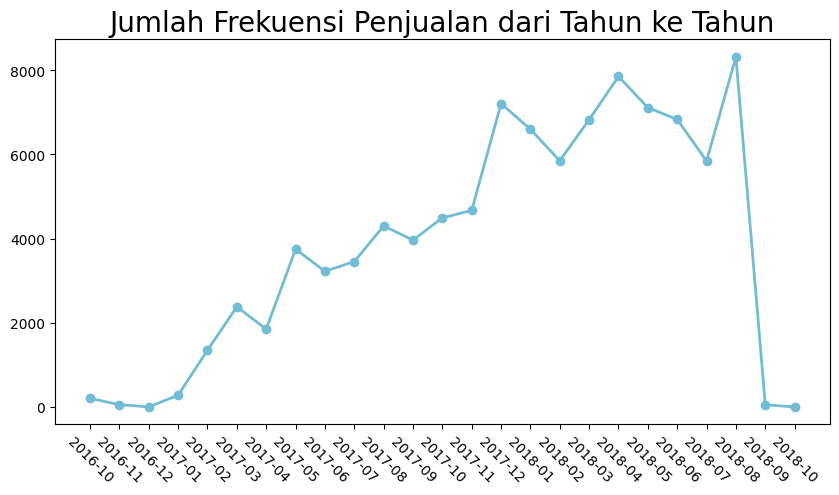

In [351]:
plt.figure(figsize=(10, 5))
plt.plot(
    pendapatan["Tahun_Bulan"],
    pendapatan["Total_Penjualan"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Jumlah Frekuensi Penjualan dari Tahun ke Tahun", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation= -45)
plt.yticks(fontsize=10)
plt.show()

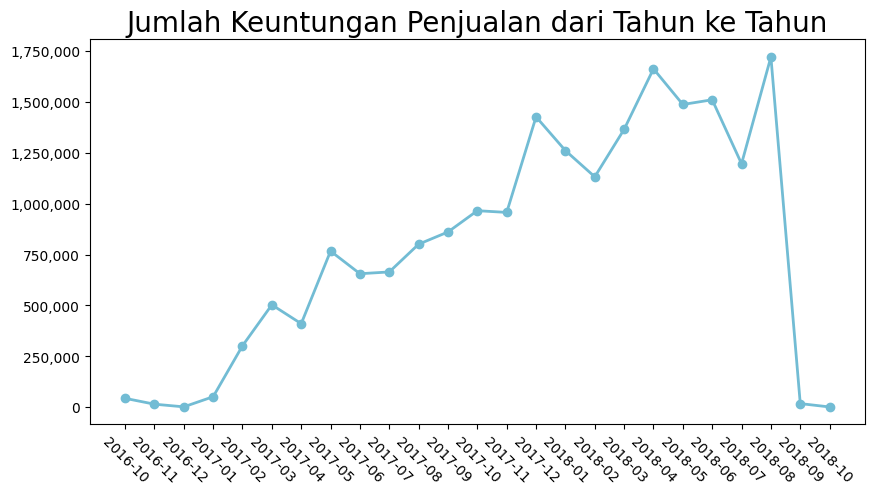

In [352]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(
    pendapatan["Tahun_Bulan"],
    pendapatan["Total_Keuntungan"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
ax.yaxis.set_major_formatter(lambda x, _: f'{x:,.0f}')
plt.title("Jumlah Keuntungan Penjualan dari Tahun ke Tahun", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation= -45)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2:

### Negara dan Kota mana yang memiliki frekuensi penjualan terbanyak dan tersedikit?

In [353]:
frek_penjKota = main_data_df.groupby(by= 'customer_city').order_id.nunique().reset_index(name='Frekuensi_Pembelian')
frek_penjKota.sort_values(by= 'Frekuensi_Pembelian', ascending= False)

,customer_city,Frekuensi_Pembelian
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521
...,...,...
1578,ibiara,1
3164,rio espera,1
3163,rio dos indios,1
3162,rio dos cedros,1


In [354]:
frek_penjKota_des= frek_penjKota.sort_values(by= 'Frekuensi_Pembelian', ascending= False).head(10)
frek_penjKota_des

,customer_city,Frekuensi_Pembelian
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521
707,campinas,1444
2964,porto alegre,1379
3247,salvador,1245
1529,guarulhos,1189
3428,sao bernardo do campo,938


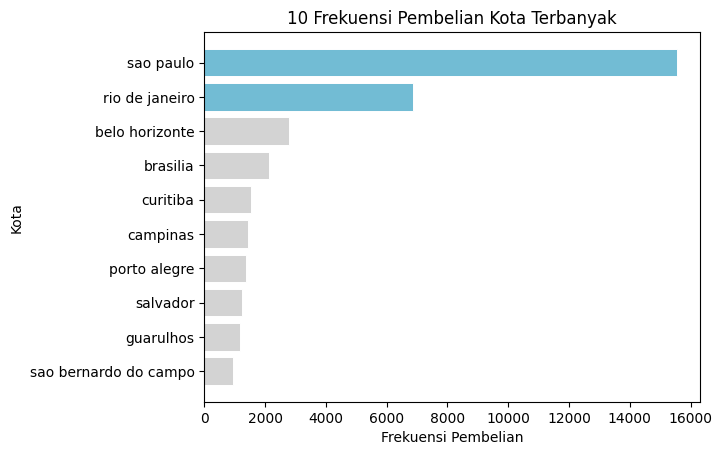

In [355]:
fig, ax = plt.subplots()
colors = ["#72BCD4", "#72BCD4"] + ["#D3D3D3"] * (len(frek_penjKota_des) - 2)
ax.barh(frek_penjKota_des['customer_city'], frek_penjKota_des['Frekuensi_Pembelian'], height=0.8, edgecolor="white", linewidth=0.7, color= colors)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Menambahkan label dan judul jika diperlukan
ax.set_xlabel('Frekuensi Pembelian')
ax.set_ylabel('Kota')
ax.set_title('10 Frekuensi Pembelian Kota Terbanyak')
ax.invert_yaxis()
plt.show()

In [356]:
frek_penjKota_asc= frek_penjKota.sort_values(by= 'Frekuensi_Pembelian', ascending= True).head(10)
frek_penjKota_asc

,customer_city,Frekuensi_Pembelian
2059,lagoao,1
2779,pedro gomes,1
814,caraibas,1
1930,japoata,1
2783,pedro velho,1
2784,peixe,1
810,caracol,1
1346,flora rica,1
1348,florania,1
807,capivari do sul,1


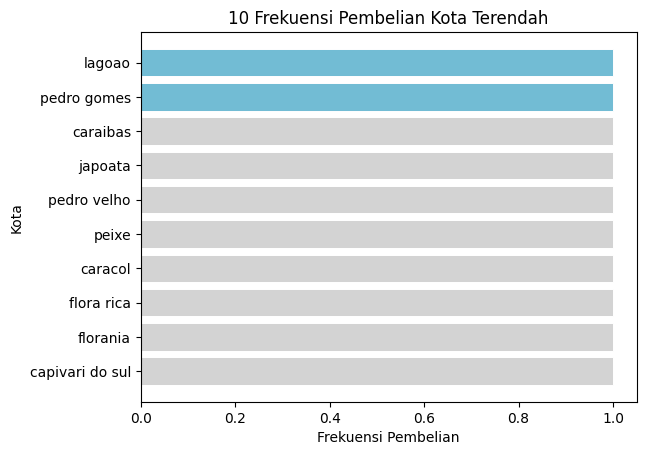

In [357]:
fig, ax = plt.subplots()
colors = ["#72BCD4", "#72BCD4"] + ["#D3D3D3"] * (len(frek_penjKota_asc) - 2)
ax.barh(frek_penjKota_asc['customer_city'], frek_penjKota_asc['Frekuensi_Pembelian'], height=0.8, edgecolor="white", linewidth=0.7, color= colors)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Menambahkan label dan judul jika diperlukan
ax.set_xlabel('Frekuensi Pembelian')
ax.set_ylabel('Kota')
ax.set_title('10 Frekuensi Pembelian Kota Terendah')
ax.invert_yaxis()
plt.show()

In [358]:
frek_penjNegara = main_data_df.groupby(by= 'customer_state').order_id.nunique().reset_index(name='Frekuensi_Pembelian')
frek_penjNegara.sort_values(by= 'Frekuensi_Pembelian', ascending= False)

,customer_state,Frekuensi_Pembelian
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045
23,SC,3637
4,BA,3380
6,DF,2140
7,ES,2033
8,GO,2020


In [359]:
frek_penjNegara_des= frek_penjNegara.sort_values(by= 'Frekuensi_Pembelian', ascending= False).head(10)
frek_penjNegara_des

,customer_state,Frekuensi_Pembelian
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045
23,SC,3637
4,BA,3380
6,DF,2140
7,ES,2033
8,GO,2020


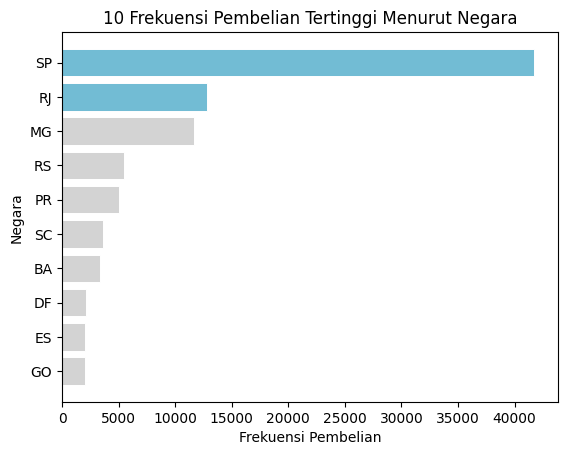

In [360]:
fig, ax = plt.subplots()
colors = ["#72BCD4", "#72BCD4"] + ["#D3D3D3"] * (len(frek_penjNegara_des) - 2)
ax.barh(frek_penjNegara_des['customer_state'], frek_penjNegara_des['Frekuensi_Pembelian'], height=0.8, edgecolor="white", linewidth=0.7, color= colors)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Menambahkan label dan judul jika diperlukan
ax.set_xlabel('Frekuensi Pembelian')
ax.set_ylabel('Negara')
ax.set_title('10 Frekuensi Pembelian Tertinggi Menurut Negara')
ax.invert_yaxis()
plt.show()

In [361]:
frek_penjNegara_asc= frek_penjNegara.sort_values(by= 'Frekuensi_Pembelian', ascending= True).head(10)
frek_penjNegara_asc

,customer_state,Frekuensi_Pembelian
21,RR,46
3,AP,68
0,AC,81
2,AM,148
20,RO,253
26,TO,280
24,SE,350
1,AL,413
19,RN,485
16,PI,495


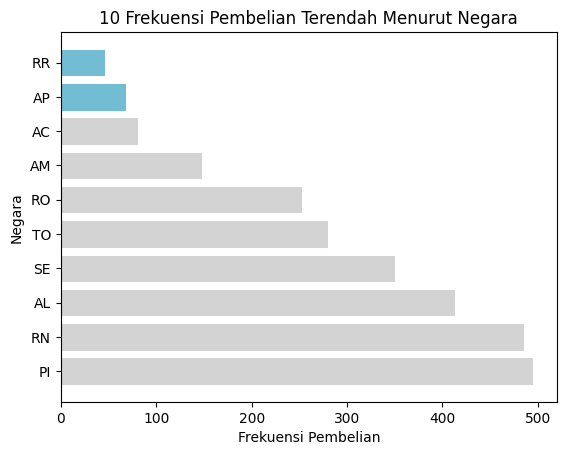

In [362]:
fig, ax = plt.subplots()

colors = ["#72BCD4", "#72BCD4"] + ["#D3D3D3"] * (len(frek_penjNegara_asc) - 2)
ax.barh(frek_penjNegara_asc['customer_state'], frek_penjNegara_asc['Frekuensi_Pembelian'], height=0.8, edgecolor="white", linewidth=0.7, color= colors)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Menambahkan label dan judul jika diperlukan
ax.set_xlabel('Frekuensi Pembelian')
ax.set_ylabel('Negara')
ax.set_title('10 Frekuensi Pembelian Terendah Menurut Negara')
ax.invert_yaxis()
plt.show()

### RFM analysis

In [363]:
rfm_df = main_data_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df['max_order_timestamp'] = rfm_df["max_order_timestamp"].dt.date
rfm_df.sort_values(by= 'frequency', ascending=False).head()

,customer_id,max_order_timestamp,frequency,monetary
52973,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08-20,17,1459.24
23472,3e43e6105506432c953e165fb2acf44c,2018-02-27,9,1000.85
37797,6469f99c1f9dfae7733b25662e7f1782,2018-06-28,7,664.20
76082,ca77025e7201e3b30c44b472ff346268,2018-06-01,7,806.61
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,2018-02-14,7,809.21


In [364]:
recent_date = main_data_df["order_delivered_customer_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,259.80,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90,163
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,138.00,586
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,51.98,370
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00,337


In [365]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,259.80,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163
2,0000f46a3911fa3c0805444483337064,1,138.00,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,51.98,370
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337


In [366]:
rfm_df.describe()

,frequency,monetary,recency
count,96096.000000,96096.000000,96096.000000
mean,1.034809,211.367279,288.108797
std,0.214384,352.259785,153.417869
min,1.000000,0.000000,0.000000
25%,1.000000,59.900000,164.000000
50%,1.000000,119.800000,269.000000
75%,1.000000,233.200000,397.000000
max,17.000000,13458.000000,773.000000


In [367]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
50975,87ab9fec999db8bd5774917de3cdf01c,1,0.0,0
14363,262e1f1e26e92e86375f86840b4ffd63,2,197.5,1
65954,af5454198a97379394cacf676e1e96cb,3,178.0,14
37382,634420a0ea42302205032ed44ac7fccc,2,130.0,16
58524,9bb92bebd4cb7511e1a02d5e50bc4655,1,0.0,18


In [368]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17,1459.24,58
23472,3e43e6105506432c953e165fb2acf44c,9,1000.85,232
37797,6469f99c1f9dfae7733b25662e7f1782,7,664.20,111
76082,ca77025e7201e3b30c44b472ff346268,7,806.61,138
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7,809.21,245


#### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [369]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,1,259.80,160,73287.0,46550.0,75484.5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163,72302.5,46550.0,3011.0
2,0000f46a3911fa3c0805444483337064,1,138.00,586,3519.0,46550.0,53202.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,51.98,370,27794.0,46550.0,19717.0
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337,32644.0,46550.0,64331.0


In [370]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,1,259.80,160,76.264361,48.441142,78.551136
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163,75.239864,48.441142,3.133325
2,0000f46a3911fa3c0805444483337064,1,138.00,586,3.661963,48.441142,55.363387
3,0000f6ccb0745a6a4b88665a16c9f078,1,51.98,370,28.923160,48.441142,20.518024
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337,33.970196,48.441142,66.944514


In [371]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(10)

,customer_id,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,3.49
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.33
2,0000f46a3911fa3c0805444483337064,2.28
3,0000f6ccb0745a6a4b88665a16c9f078,1.48
4,0004aac84e0df4da2b147fca70cf8255,2.84
5,0004bd2a26a76fe21f786e4fbd80607f,3.56
6,00050ab1314c0e55a6ca13cf7181fecf,1.42
7,00053a61a98854899e70ed204dd4bafe,3.63
8,0005e1862207bf6ccc02e4228effd9a0,2.97
9,0005ef4cd20d2893f0d9fbd94d3c0d97,3.19


#### Segmentasi customer berdasarkan RFM_score

In [372]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,3.49,Medium value customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.33,lost customers
2,0000f46a3911fa3c0805444483337064,2.28,Low value customers
3,0000f6ccb0745a6a4b88665a16c9f078,1.48,lost customers
4,0004aac84e0df4da2b147fca70cf8255,2.84,Low value customers
5,0004bd2a26a76fe21f786e4fbd80607f,3.56,Medium value customer
6,00050ab1314c0e55a6ca13cf7181fecf,1.42,lost customers
7,00053a61a98854899e70ed204dd4bafe,3.63,Medium value customer
8,0005e1862207bf6ccc02e4228effd9a0,2.97,Low value customers
9,0005ef4cd20d2893f0d9fbd94d3c0d97,3.19,Medium value customer


In [373]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,2584
1,Low value customers,46435
2,Medium value customer,27849
3,Top customers,495
4,lost customers,18733


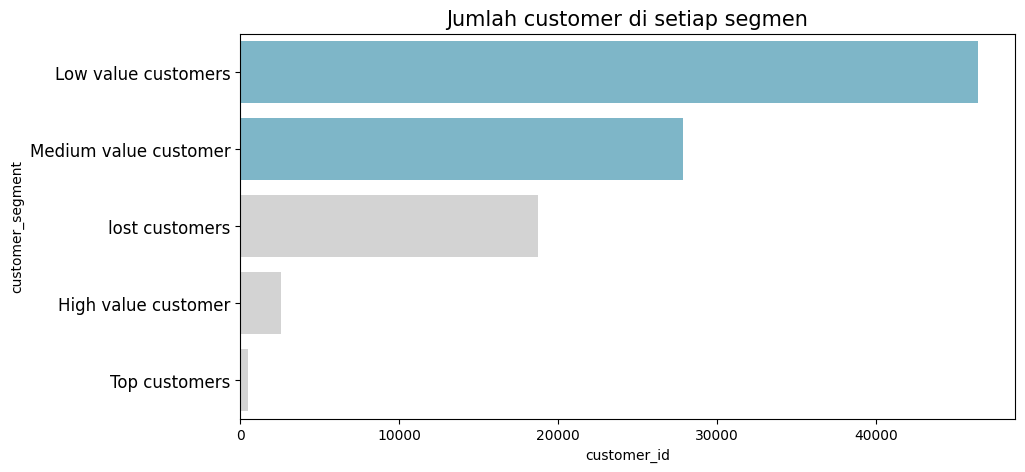

In [374]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#72BCD4"] + ["#D3D3D3"] * (len(customer_segment_df) - 2)

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    hue= 'customer_segment',
    data=customer_segment_df.sort_values(by="customer_id", ascending=False),
    legend= False,
    palette=colors_
)
plt.title("Jumlah customer di setiap segmen", loc="center", fontsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

### Conclution pertanyaan 1 "Bagaimana performa penjualan dan revenue perusahaan dalam beberapa tahun terakhir?"

Bisa dilihat di dalam chart bahwa performa dan revenue perusahaan dari waktu ke waktu yaitu bersifat fluktuatif.
Di mana penjualan tertinggi terjadi pada tahun **2018-08** dan terendah di tahun **2018-10**,
sedangkan revenue tertinggi terjadi pada tahun **2018-08** sedangkan terendah di tahun **2018-10**

### Conclution pertanyaan 2 "Negara dan Kota mana yang memiliki frekuensi penjualan terbanyak dan tersedikit?"

Bisa dilihat di dalam chart bahwa negara dan kota memiliki frekuensi penjualan yang berbeda-beda.
Di mana kota dengan frekuensi penjualan tertinggi adalah **Sao Paulo** dengan frekuensi sebesar **15540** dan terendah dengan nilai 1 di mana banyak kota yang memiliki nilai frekuensi tersebut,
sedangkan negara dengan frekuensi penjualan tertinggi adalah **SP** dengan total frekuensi sebanyak **41746** dan terendah adalah RR dengan frekuensi **46**